In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import *
from scipy.optimize import curve_fit
import random
import sympy as sy
import scipy.linalg as linalg
import scipy
from scipy import integrate
import math

## Examen 3

1) Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal con fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$. $x$ es la posicion y $v$ velocidad. 




Este es un M.A.S osea que la ecuación y sus derivadas nos quedarían así:

$\frac{d^2x}{dt^2}+ω^2x=0$


$\frac{dx}{dt}=x$


$\frac{dv}{dt}=- ωx$

In [ ]:
#Definir Edo con los datos dados

def Ef(y,t):
    x,v=y
    dr=(v,-np.sqrt(1/0.2)*x)
    return dr

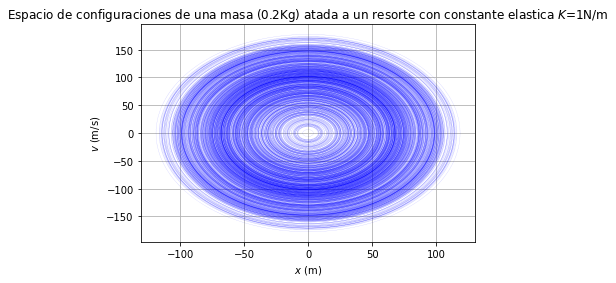

In [ ]:
N=1000
x0=np.random.uniform(-100,100,N)
v0=np.random.uniform(-100, 100,N)

t=25

for x1, v1 in zip(x0, v0):
    t1=np.linspace(0,t,300)
    y0=[x1,v1]
    y=integrate.odeint(Ef,y0,t1)
    x=y[:,0]
    v=y[:,1]
    plt.plot(x,v,color = "blue",lw = 0.01 )    

plt.title( "Espacio de configuraciones de una masa (0.2Kg) atada a un resorte con constante elastica $K$=1N/m" )
plt.xlabel( "$x$ (m)")
plt.ylabel( "$v$ (m/s)" )
plt.grid()    

La gráfica está alejada del todo lo que dificulta su lectura, lo que podemos acercarnos para hacerla un poco más legible, limitando la gráfica y cambiando los parametros para x0 y v0

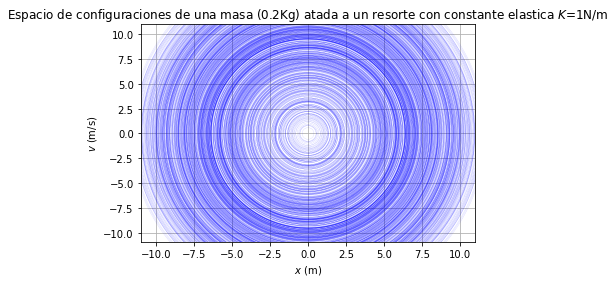

In [ ]:
N=1000
x0=np.random.uniform(-10,10,N)
v0=np.random.uniform(-10, 10,N)

t=25

for x1, v1 in zip(x0, v0):
    t1=np.linspace(0,t,300)
    y0=[x1,v1]
    y=integrate.odeint(Ef,y0,t1)
    x=y[:,0]
    v=y[:,1]
    plt.plot(x,v, color = "blue",lw = 0.01 )    

plt.title( "Espacio de configuraciones de una masa (0.2Kg) atada a un resorte con constante elastica $K$=1N/m" )
plt.xlabel( "$x$ (m)")
plt.ylabel( "$v$ (m/s)" )
plt.xlim( (x0.min()-1,x0.max()+1) )
plt.ylim( (v0.min()-1, v0.max()+1) )
plt.grid()    

2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

!cp '/content/gdrive/MyDrive/Colab Notebooks/strontium.json' 'strontium.json'

Mounted at /content/gdrive


In [ ]:
dat= pd.read_json('strontium.json')

In [ ]:
df= pd.DataFrame.from_dict(dat)
df

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


In [ ]:
#definir la función

def fun(t, lda):
    N0=1000
    return N0*(np.e**(-t*lda))

In [ ]:
#lda es la constante de decaimineto
#ld es el error

larray,dlarray=curve_fit(fun,df['t'], df['N(t)'])

lda=larray[0]
ld=np.sqrt(dlarray[0][0])
print(f'λ = {lda:.7f} ± {ld:.7f}')

λ = 0.0247626 ± 0.0003617


Teniendo el valor de lambda, podemos despejar la segunda ecuación y hallar tau (τ), que es la vida media:

$λ=\frac{ln(2)}{τ}$


$τ=\frac{ln(2)}{λ}$

Hay que tener en cuenta que también necesitamos el error para la vida media

Nos queda entonces que 

$Δτ=Δλ\frac{ln(2)}{λ^2}$

In [ ]:
#definimos y evaluamos la nueva ecuación de manera simple

tau= np.log(2)/lda

#deinimos y evaluamos el error

dtau=ld*(np.log(2)/(lda**2))

print(f' τ = {tau:.7f} ± {dtau:.7f}')

 τ = 27.9916415 ± 0.4088837


Con estos datos lo unico que resta es hacer la gráfica

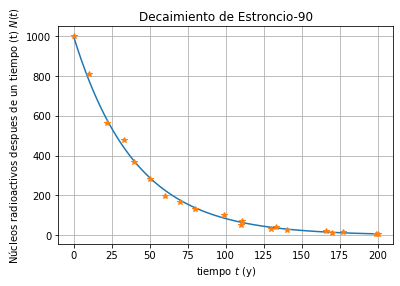

In [ ]:
t=np.linspace(0,200,1000)
plt.plot(t, fun(t,lda))
plt.plot(df.t, df['N(t)'],'*')
plt.title('Decaimiento de Estroncio-90')
plt.xlabel('tiempo $t$ (y)')
plt.ylabel('Núcleos radioactivos despues de un tiempo (t) $N(t)$')
plt.grid()
plt.show()